#**Deep Learning Project-3**

Name: Shweta Sharma
UIN: 433003780

Project Three. Due: 11:59pm (Central Time) on Friday 4/28/2023. (Submit all your code with detailed/clear explanations in a single Jupyter notebook file in Canvas. And email your trained model AS WELL AS its output for the "testing dataset" to csce636projects2023@gmail.com with your name and UIN . 120 points)

This project is on language modeling for an artificial language. We want to build a model such that given a "partial text" in the artificial language, the model can predict the next word.

As a training dataset, a list of 5,000 texts in the artificial language are here.  (After downloading it, you can use pickle.load(open(path,'rb')) to open it. It is a list of 5,000 strings in Python. For example, a string may be 'a j a d a d c g b f a i c f b e a e a h b e a d c d c d c d b d c f '.)

From the above 5,000 strings, we have obtained 5,000 "partial texts" and the corresponding "next word". Each "partial text" consists of the first k words of the corresponding string (for some random integer k), and the corresponding "next word" is the (k+1)-th word in that string. For example, for the string 'a j a d a d c g b f a i c f b e a e a h b e a d c d c d c d b d c f ', the "partial text" may be ['a', 'j', 'a', 'd', 'a', 'd', 'c', 'g', 'b', 'f', 'a', 'i', 'c', 'f', 'b', 'e', 'a'], which is a list of the first k=17 words in the string, and the "next word" is 'e', which is the 18-th word in the string.

Your task is to design and train a good model, which takes "partial texts" as input, and predicts the "next word" for each "partial text".

Your trained model will be evaluated using a "testing dataset" (shown below). The testing dataset also consists of a list of "partial texts" (as the model's input) and a list of "next word" (to be compared to your model's output). In the list of "partial texts", each "partial text" is a list of words instead of a single string, just like the "partial texts" above that we have for the training set. The performance of your model will be measured by its "accuracy for words", defined as the fraction of "next words" that your model  correctly predicts.

You should submit THREE things:

1) Place all your code in a single Jupyter notebook, and submit it in Canvas. You should accompany your code with clear/detailed explanations, so that we can understand the methods you used.

2) Email your trained model to csce636projects2023@gmail.com . (Please make sure to include your name and UIN in the email.) We need to be able to test your model very easily in Google CoLab by running a simple line of code on our testing dataset. And you need to specify in your Jupyter notebook what that single line of code is.

3) As the "testing dataset" for this project, a list of 5,000 "partial texts" are here. Please run your trained model on it to get the 5,000  corresponding "next word" (as a list of 5,000 strings in Python), and submit the list by emailing it to csce636projects2023@gmail.com . (You can use pickle.dump(yourList, open(path,'wb')) to save your list in a file, and then attach it to the email.) Please note that we will use your model to verify the above submitted texts, but we will use our own code to compute the accuracy of your model on the testing dataset.     

Method of grading: your grade for this project will be equal to:

(test_accuracy_for_words +  0.2) x 100

For example, if your test accuracy is 0.65, then the grade is 85; and if your test accuracy is 0.9, then the grade is 110. However, if the code in your Jupyter notebook is incomplete, the grade will be 0; if the explanations in the Jupyter notebook are not clear, then 5 points will be taken away; and if we need to make any (even simple) modification to your code in order to run it for testing (instead of simply running a single line of code following your instruction), then some points will be taken away (depending on how serious the modification needs to be).

**Ans:**


The code is loading a dataset for training a model. The dataset consists of three variables, train_input, train_input_prefix, and train_input_next. These variables are loaded using pickle.load() from three different files with paths '/content/DS_5_train_input (1)', '/content/DS_5_train_input_prefixList', and '/content/DS_5_train_input_nextWord', respectively.

The train_input variable likely contains the input sequences for the model, train_input_prefix contains the prefixes of the input sequences, and train_input_next contains the next word in the input sequence after each prefix.

The code is using the NumPy library, which provides support for large multi-dimensional arrays and matrices, and the Keras library from TensorFlow, which is a popular deep learning framework for building and training neural networks.

In [ ]:
import numpy as np
import pickle

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding

# Load the dataset
# Load the training data
train_input = pickle.load(open('/content/DS_5_train_input (1)', 'rb'))
train_input_prefix = pickle.load(open('/content/DS_5_train_input_prefixList', 'rb'))
train_input_next = pickle.load(open('/content/DS_5_train_input_nextWord', 'rb'))


In [ ]:
train_input[0]

'a g b f a f a e a k a j c f b f c d a k a k c e b g a h a k b d b f b f b d c d '

In [ ]:
vocab = set()
l=0

for line in train_input:
  if len(line.split()) > l:
    l=len(line.split())
  for i in line:
    vocab.add(i)

print(vocab)
print(l)

{'f', 'h', ' ', 'k', 'd', 'b', 'j', 'i', 'g', 'a', 'c', 'e'}
64


In [ ]:
import tensorflow as tf


dataset = tf.data.Dataset.from_tensor_slices(train_input)

batch_size = 32
batched_dataset = dataset.batch(batch_size)

The code is using the TextVectorization layer from Keras to vectorize the text data. The TextVectorization layer is a convenient tool for preprocessing text data in a way that can be used as input to a neural network.

The max_tokens parameter specifies the maximum vocabulary size. In this case, the vocabulary size is 12, which means that the TextVectorization layer will only consider the 12 most frequent words in the text data.

The output_mode parameter is set to "int", which means that the layer will output integer indices representing each word in the vocabulary.

The output_sequence_length parameter is set to 150, which means that the vectorized sequences will be padded or truncated to a length of 150.

The adapt() method is called on the text_vectorization object to fit the layer to the text data. The adapt() method will analyze the text data and build the vocabulary for the TextVectorization layer based on the specified max_tokens parameter. The batched_dataset variable likely contains the training data in a format that can be processed by the TextVectorization layer.

In [ ]:
# Preparing a TextVectorization layer

from tensorflow.keras.layers import TextVectorization

sequence_length = 150
vocab_size = 12
text_vectorization = TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length,
)
text_vectorization.adapt(batched_dataset)

The code is defining a function called prepare_lm_dataset() that takes a batch of text data as input and returns two variables x and y.

The text_vectorization layer defined earlier is used to vectorize the input text data in the text_batch variable. The resulting vectorized_sequences variable contains the vectorized sequences with integer indices representing each word in the vocabulary.

The x variable is defined as all but the last element of each sequence in the vectorized_sequences. This is because the language model will be trained to predict the next word in a sequence based on the previous words in the sequence.

The y variable is defined as all but the first element of each sequence in the vectorized_sequences. This is because the model will be trained to predict the next word in the sequence based on the input sequence, which excludes the first word.

The lm_dataset variable is defined as a mapped version of the batched_dataset variable, with each element being transformed by the prepare_lm_dataset() function. This will create a new dataset object that can be used to train a language model. The num_parallel_calls parameter indicates that the function should be applied to multiple elements in parallel.

In [ ]:
#Setting up a language modeling dataset

def prepare_lm_dataset(text_batch):
    vectorized_sequences = text_vectorization(text_batch)
    x = vectorized_sequences[:, :-1]
    y = vectorized_sequences[:, 1:]
    return x, y

lm_dataset = batched_dataset.map(prepare_lm_dataset, num_parallel_calls=4)

The code is splitting the language modeling dataset into training and validation sets.

The val_size variable is defined to represent the fraction of the dataset that should be used for validation. In this case, val_size is set to 0.15, which means that 15% of the dataset will be used for validation.

The val_steps variable is calculated as the number of elements in the validation set. It is computed by multiplying the total number of elements in the dataset by the validation fraction and then converting it to an integer using the int() function.

The train_steps variable is calculated as the number of elements in the training set. It is computed by subtracting the number of elements in the validation set from the total number of elements in the dataset.

The val_dataset variable is defined as the first val_steps elements of the lm_dataset. The take() method is used to create a new dataset that contains the specified number of elements from the beginning of the lm_dataset.

The train_dataset variable is defined as the remaining elements of the lm_dataset after the val_dataset has been removed. The skip() method is used to create a new dataset that skips the specified number of elements from the beginning of the lm_dataset.

In [ ]:
#dividing dataset into training and validation
# Define the size of the validation set as a fraction of the total dataset
val_size = 0.15

# Calculate the number of elements in the validation set
val_steps = int(val_size * lm_dataset.cardinality().numpy())

# Calculate the number of elements in the training set
train_steps = lm_dataset.cardinality().numpy() - val_steps

# Split the dataset into training and validation
val_dataset = lm_dataset.take(val_steps)
train_dataset = lm_dataset.skip(val_steps)


In [ ]:
train_dataset

<_SkipDataset element_spec=(TensorSpec(shape=(None, 149), dtype=tf.int64, name=None), TensorSpec(shape=(None, 149), dtype=tf.int64, name=None))>

**Positional Embedding Layer:**

The code defines a custom layer called PositionalEmbedding that adds positional embeddings to the input sequence.

The layer takes three arguments during initialization:

sequence_length: An integer specifying the length of the input sequence.
input_dim: An integer specifying the size of the input vocabulary.
output_dim: An integer specifying the dimensionality of the output embeddings.
During initialization, the layer creates two Embedding layers: one for token embeddings and one for positional embeddings. The token_embeddings layer is an Embedding layer that maps the integer indices of the input tokens to their corresponding embeddings. The position_embeddings layer is another Embedding layer that maps the integer positions in the input sequence to their corresponding embeddings.

The call() method takes the input tensor as input and returns the tensor after adding the token embeddings and the positional embeddings. The length of the input tensor is calculated using the tf.shape() function, and the positions are generated using the tf.range() function. The token_embeddings and position_embeddings are computed using their respective Embedding layers, and then added together.

The compute_mask() method returns a boolean mask for the input tensor, indicating which elements are not equal to 0. This is used to filter out the padding tokens in the subsequent layers.

The get_config() method returns a dictionary containing the configuration of the layer, including the sequence_length, input_dim, and output_dim parameters. This is useful for saving and loading the model.

**Transformer Decoder Layer:**

This is a TransformerDecoder class in a sequence-to-sequence model, which extends the Layer class from TensorFlow. The TransformerDecoder is a core component of the decoder block of a transformer architecture.

The class takes in three parameters in the constructor - embed_dim, dense_dim, and num_heads, which represent the dimensions of the embedding layer, the dense layer, and the number of attention heads, respectively.

The class contains three multi-head attention layers (attention_1, attention_2, and attention_3) and a dense projection layer (dense_proj). The multi-head attention layers take in the query, value, and key inputs and apply the scaled dot-product attention mechanism. The dense_proj layer is a feedforward network that transforms the output of the attention layer.

The class also contains several layer normalization layers (layernorm_1, layernorm_2, layernorm_3, and layernorm_4) that normalize the output of each layer. The get_causal_attention_mask function creates a causal mask for the self-attention mechanism.

The call function takes in three parameters - inputs, encoder_outputs, and mask - which represent the inputs to the decoder, the output of the encoder, and the mask for the inputs, respectively. It first applies the self-attention mechanism (attention_1) to the inputs using a causal mask. It then applies the second attention mechanism (attention_2) to the encoder outputs and the output of the first attention layer. Finally, it applies the third attention mechanism (attention_3) to the output of the second attention layer and the encoder outputs. The output of the third attention mechanism is passed through the dense projection layer, and the result is added to the output of the third attention layer. The output is then normalized using the layernorm_4 layer and returned.





In [ ]:
#A Transformer-based sequence-to-sequence model
import tensorflow as tf
from tensorflow.keras import layers

class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)

    def get_config(self):
        config = super(PositionalEmbedding, self).get_config()
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
        })
        return config


class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
          num_heads=num_heads, key_dim=embed_dim)
        self.attention_2 = layers.MultiHeadAttention(
          num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dropout(0.4),
             layers.Dense(embed_dim)]
        )

        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def get_config(self):
        config = super(TransformerDecoder, self).get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1),
             tf.constant([1, 1], dtype=tf.int32)], axis=0)
        return tf.tile(mask, mult)

    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(
                mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)
        else:
            padding_mask = mask
        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=causal_mask)
        attention_output_1 = self.layernorm_1(inputs + attention_output_1)
        attention_output_2 = self.attention_2(
            query=attention_output_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )
        attention_output_2 = self.layernorm_2(attention_output_1 + attention_output_2)
        proj_output = self.dense_proj(attention_output_2)
        return self.layernorm_3(attention_output_2 + proj_output)



This code defines a Keras model for a Transformer decoder. The model takes an input tensor of shape (batch_size, sequence_length) containing integer tokens, which are passed through a PositionalEmbedding layer and then into a TransformerDecoder layer. Finally, the output from the TransformerDecoder layer is passed through a Dense layer with vocab_size units and a softmax activation function to produce a probability distribution over the vocabulary.

The TransformerDecoder layer uses multi-head self-attention and multi-head encoder-decoder attention to process the input tokens. It also includes a series of dense layers to project the attention output to the output vocabulary size. The PositionalEmbedding layer adds positional embeddings to the input tokens, which are required for the Transformer architecture to capture the order of the sequence. The inputs tensor should contain integer tokens, where each integer represents the index of a word in a vocabulary.

This model can be used for a variety of sequence-to-sequence tasks, such as language translation, summarization, or question answering.

In [ ]:
# A simple Transformer-based language model
from tensorflow import keras
from tensorflow.keras import layers
embed_dim = 256
latent_dim = 1024
num_heads = 2

inputs = keras.Input(shape=(None,), dtype="int64")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, x)
outputs = layers.Dense(vocab_size, activation="softmax")(x)
model = keras.Model(inputs, outputs)



We are training a transformer model using the rmsprop optimizer and monitoring the validation accuracy. The model will be saved at each epoch if the validation accuracy improves (ModelCheckpoint callback).

We are training the model for 100 epochs using rmsprop optimisation function

In [ ]:
#Training the sequence-to-sequence Transformer
from tensorflow.keras.optimizers import Adam

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="transformer_model.keras",
        save_best_only=True,
        monitor="val_accuracy")]

#model.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

history=model.fit(train_dataset, epochs=100, validation_data=val_dataset, callbacks=callbacks)

Epoch 1/100
134/134 [==============================] - 14s 34ms/step - loss: 1.6896 - accuracy: 0.2944 - val_loss: 1.4460 - val_accuracy: 0.3337
Epoch 2/100
134/134 [==============================] - 4s 29ms/step - loss: 1.4328 - accuracy: 0.3186 - val_loss: 1.4114 - val_accuracy: 0.3360
Epoch 3/100
134/134 [==============================] - 4s 29ms/step - loss: 1.4025 - accuracy: 0.3288 - val_loss: 1.4052 - val_accuracy: 0.3358
Epoch 4/100
134/134 [==============================] - 4s 30ms/step - loss: 1.3893 - accuracy: 0.3340 - val_loss: 1.3971 - val_accuracy: 0.3382
Epoch 5/100
134/134 [==============================] - 4s 30ms/step - loss: 1.3815 - accuracy: 0.3376 - val_loss: 1.3845 - val_accuracy: 0.3428
Epoch 6/100
134/134 [==============================] - 4s 30ms/step - loss: 1.3756 - accuracy: 0.3400 - val_loss: 1.3785 - val_accuracy: 0.3431
Epoch 7/100
134/134 [==============================] - 4s 30ms/step - loss: 1.3722 - accuracy: 0.3416 - val_loss: 1.3701 - val_accuracy

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

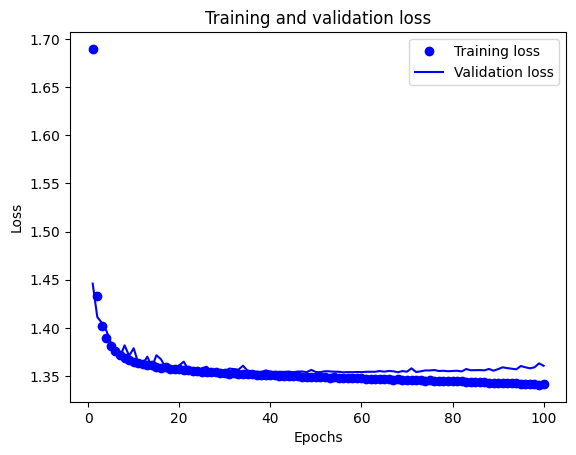

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

The model seems to overfit after 30 epochs, but we anyways save the best model having highest validation accuracy.

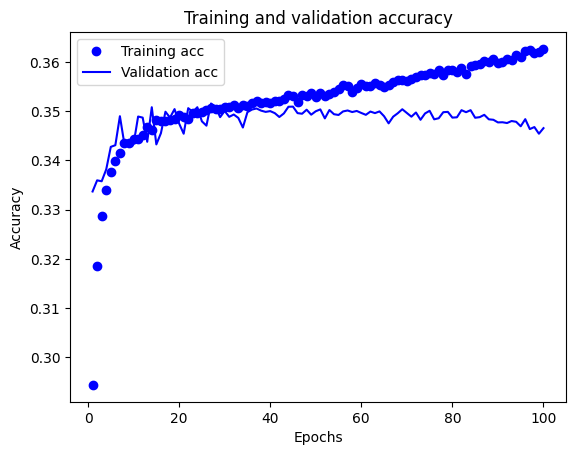

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# prompt = " ".join(dataset_input[40])
# tokenized_sentence = text_vectorization([prompt])
# predictions = model.predict(tokenized_sentence)
# vectorized_prompt = text_vectorization([prompt])[0].numpy()
# prompt_length = np.nonzero(vectorized_prompt == 0)[0][0]
# next_token = sample_next( predictions[0, prompt_length - 1 , :])
# sampled_token = tokens_index[next_token]
# print(sampled_token)

We are trying to load a saved model using the load_model function from Keras. However, since we have used custom layers (PositionalEmbedding and TransformerDecoder) in your model, we need to pass a custom_objects dictionary to the load_model function so that Keras knows how to reconstruct these layers.

In [ ]:
import pickle
from keras.utils import custom_object_scope


# Define the custom objects dictionary
custom_objects = {'PositionalEmbedding': PositionalEmbedding, 'TransformerDecoder': TransformerDecoder}

# Load the model using custom_object_scope
with custom_object_scope(custom_objects):
    model_from_memory = keras.models.load_model("transformer_model.keras")

The predict_next_word function takes an input sentence and a temperature value as inputs and returns the predicted next word using the loaded transformer model.

In [ ]:
import numpy as np

tokens_index = dict(enumerate(text_vectorization.get_vocabulary()))

def sample_next(predictions, temperature=1.0):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions) / temperature
    exp_preds = np.exp(predictions)
    predictions = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, predictions, 1)
    return np.argmax(probas)

def predict_next_word(input_sentence, temp):
  #prompt = " ".join(input_sentence)
  tokenized_sentence = text_vectorization([input_sentence])
  predictions = model_from_memory.predict(tokenized_sentence, verbose=0)
  vectorized_prompt = text_vectorization([input_sentence])[0].numpy()
  prompt_length = np.nonzero(vectorized_prompt == 0)[0][0]
  next_token = sample_next( predictions[0, prompt_length - 1 , :], temp)
  sampled_token = tokens_index[next_token]
  return sampled_token

We are comparing the predicted output with our actual output on the training dataset. This shows us that temp=0.2 has the best output for our training dataset so we use this temp to generate the next words for our testing dataset.

In [ ]:
count=0
for temp in [0.2, 0.5, 0.7, 1, 1.5]:
  count=0
  for i in range(0, 5000):

    input_sent = " ".join(train_input_prefix[i])
    output = predict_next_word(input_sent, temp)
    #print(dataset_output[i])
    if(output == train_input_next[i]):
      count+=1

  print("with temp=", temp)
  print(count/5000)



with temp= 0.2
0.3236
with temp= 0.5
0.316
with temp= 0.7
0.3004
with temp= 1
0.2902
with temp= 1.5
0.2756


We use our function and transformer model to generate the next word for our testing dataset with temp=0.2

In [ ]:
test_input_prefix = pickle.load(open('/content/DS_6_test_input_prefixList', 'rb'))
results=[]
for i in range(0, 5000):

  input_sent = " ".join(test_input_prefix[i])
  output = predict_next_word(input_sent, 0.2)
  results.append(output)

print(results)


['e', 'e', 'e', 'a', 'c', 'f', 'c', 'a', 'c', 'e', 'a', 'b', 'a', 'a', 'c', 'e', 'f', 'c', 'e', 'g', 'c', 'e', 'e', 'f', 'd', 'a', 'a', 'c', 'a', 'e', 'g', 'c', 'b', 'e', 'g', 'e', 'e', 'b', 'd', 'a', 'c', 'a', 'e', 'g', 'e', 'b', 'd', 'c', 'g', 'e', 'e', 'e', 'a', 'g', 'b', 'a', 'e', 'e', 'c', 'b', 'e', 'c', 'c', 'e', 'b', 'g', 'a', 'c', 'c', 'a', 'f', 'a', 'a', 'b', 'c', 'b', 'f', 'g', 'k', 'a', 'e', 'e', 'c', 'a', 'k', 'a', 'a', 'b', 'd', 'b', 'f', 'c', 'g', 'e', 'e', 'd', 'b', 'c', 'c', 'd', 'a', 'c', 'c', 'g', 'c', 'c', 'f', 'b', 'c', 'g', 'g', 'g', 'd', 'e', 'c', 'k', 'e', 'a', 'g', 'd', 'a', 'g', 'b', 'g', 'a', 'c', 'k', 'c', 'e', 'e', 'c', 'e', 'a', 'f', 'e', 'e', 'a', 'a', 'e', 'd', 'c', 'c', 'e', 'c', 'a', 'e', 'c', 'k', 'd', 'e', 'c', 'c', 'a', 'e', 'g', 'a', 'g', 'd', 'f', 'b', 'd', 'b', 'e', 'f', 'a', 'a', 'e', 'a', 'c', 'f', 'b', 'c', 'c', 'a', 'f', 'b', 'a', 'f', 'e', 'a', 'a', 'g', 'e', 'f', 'e', 'f', 'g', 'a', 'f', 'e', 'd', 'd', 'e', 'e', 'e', 'g', 'd', '', 'f', 'b', 

In [ ]:
print(len(results))
print(train_input_next)

5000
['a', 'c', 'k', 'g', 'd', 'c', 'd', 'e', 'a', 'e', 'a', 'd', 'c', 'e', 'g', 'g', 'a', 'g', 'a', 'f', 'a', 'a', 'b', 'g', 'b', 'd', 'f', 'f', 'b', 'k', 'a', 'b', 'b', 'c', 'e', 'i', 'f', 'b', 'f', 'e', 'j', 'f', 'a', 'c', 'a', 'd', 'b', 'b', 'k', 'c', 'b', 'b', 'd', 'd', 'j', 'c', 'g', 'f', 'b', 'd', 'b', 'c', 'g', 'd', 'f', 'b', 'b', 'b', 'c', 'a', 'b', 'b', 'a', 'a', 'c', 'd', 'a', 'b', 'g', 'a', 'c', 'g', 'a', 'a', 'c', 'c', 'g', 'e', 'i', 'a', 'g', 'd', 'a', 'c', 'a', 'g', 'b', 'c', 'c', 'e', 'a', 'a', 'j', 'a', 'a', 'e', 'd', 'a', 'e', 'f', 'a', 'a', 'd', 'a', 'g', 'h', 'a', 'a', 'f', 'f', 'b', 'd', 'd', 'd', 'c', 'c', 'f', 'a', 'a', 'b', 'e', 'g', 'f', 'a', 'f', 'f', 'a', 'b', 'a', 'f', 'a', 'f', 'b', 'd', 'f', 'b', 'a', 'b', 'a', 'b', 'e', 'e', 'a', 'a', 'd', 'b', 'c', 'a', 'f', 'b', 'f', 'a', 'a', 'a', 'f', 'j', 'e', 'h', 'f', 'b', 'd', 'a', 'e', 'c', 'd', 'g', 'c', 'a', 'f', 'b', 'h', 'a', 'c', 'k', 'e', 'c', 'c', 'i', 'e', 'e', 'e', 'a', 'j', 'b', 'k', 'g', 'g', 'c', 'k',

We save the generated words into a file.

In [ ]:
test_output_path="/content/DS_6_test_output_nextWord"
pickle.dump(results, open(test_output_path,'wb'))